# Fundamental Data Science for Data Scientist

# In Depth - Decision Trees and Forests

In [1]:
from time import time
import logging
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np


Here we'll explore a class of algorithms based on decision trees.
Decision trees at their root are extremely intuitive.  They
encode a series of "if" and "else" choices, similar to how a person might make a decision.
However, which questions to ask, and how to proceed for each answer is entirely learned from the data.

For example, if you wanted to create a guide to identifying an animal found in nature, you
might ask the following series of questions:

- Is the animal bigger or smaller than a meter long?
    + *bigger*: does the animal have horns?
        - *yes*: are the horns longer than ten centimeters?
        - *no*: is the animal wearing a collar
    + *smaller*: does the animal have two or four legs?
        - *two*: does the animal have wings?
        - *four*: does the animal have a bushy tail?

and so on.  This binary splitting of questions is the essence of a decision tree.

One of the main benefit of tree-based models is that they require little preprocessing of the data.
They can work with variables of different types (continuous and discrete) and are invariant to scaling of the features.

Another benefit is that tree-based models are what is called "nonparametric", which means they don't have a fix set of parameters to learn. Instead, a tree model can become more and more flexible, if given more data.
In other words, the number of free parameters grows with the number of samples and is not fixed, as for example in linear models.


## Decision Tree Regression

A decision tree is a simple binary classification tree that is
similar to nearest neighbor classification.  It can be used as follows:

/Users/kris/anaconda3/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


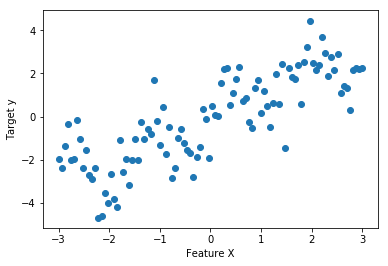

In [2]:
from figures import make_dataset
x, y = make_dataset()
X = x.reshape(-1, 1)

plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.scatter(X, y);

In [11]:
from sklearn import tree

reg = tree.DecisionTreeRegressor(max_depth=5)
reg.fit(X, y)

X_fit = np.linspace(-3, 3, 1000).reshape((-1, 1))
y_fit_1 = reg.predict(X_fit)

plt.plot(X_fit.ravel(), y_fit_1, color='blue', label="prediction")
plt.plot(X.ravel(), y, '.k', label="training data")
plt.legend(loc="best");

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 1 

A single decision tree allows us to estimate the signal in a non-parametric way,
but clearly has some issues.  In some regions, the model shows high bias and
under-fits the data.
(seen in the long flat lines which don't follow the contours of the data),
while in other regions the model shows high variance and over-fits the data
(reflected in the narrow spikes which are influenced by noise in single points).

Decision Tree Classification
==================
Decision tree classification work very similarly, by assigning all points within a leaf the majority class in that leaf:


In [73]:
from time import time
import logging
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from figures import plot_2d_separator

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

iris = pd.read_csv("iris.csv")

iris

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, 0:4], 
                                                    iris['species'], 
                                                    train_size=0.7, 
                                                    random_state=123)
print("Labels for training and testing data")
print(y_train)


Labels for training and testing data
114     Iris-virginica
136     Iris-virginica
53     Iris-versicolor
19         Iris-setosa
38         Iris-setosa
110     Iris-virginica
23         Iris-setosa
9          Iris-setosa
86     Iris-versicolor
91     Iris-versicolor
89     Iris-versicolor
79     Iris-versicolor
101     Iris-virginica
65     Iris-versicolor
115     Iris-virginica
41         Iris-setosa
124     Iris-virginica
95     Iris-versicolor
21         Iris-setosa
11         Iris-setosa
103     Iris-virginica
74     Iris-versicolor
122     Iris-virginica
118     Iris-virginica
44         Iris-setosa
51     Iris-versicolor
81     Iris-versicolor
149     Iris-virginica
12         Iris-setosa
129     Iris-virginica
            ...       
120     Iris-virginica
137     Iris-virginica
125     Iris-virginica
147     Iris-virginica
39         Iris-setosa
84     Iris-versicolor
2          Iris-setosa
67     Iris-versicolor
55     Iris-versicolor
49         Iris-setosa
68     Iris-versicol

In [16]:
print(y_test)

72     Iris-versicolor
112     Iris-virginica
132     Iris-virginica
88     Iris-versicolor
37         Iris-setosa
138     Iris-virginica
87     Iris-versicolor
42         Iris-setosa
8          Iris-setosa
90     Iris-versicolor
141     Iris-virginica
33         Iris-setosa
59     Iris-versicolor
116     Iris-virginica
135     Iris-virginica
104     Iris-virginica
36         Iris-setosa
13         Iris-setosa
63     Iris-versicolor
45         Iris-setosa
28         Iris-setosa
133     Iris-virginica
24         Iris-setosa
127     Iris-virginica
46         Iris-setosa
20         Iris-setosa
31         Iris-setosa
121     Iris-virginica
117     Iris-virginica
4          Iris-setosa
130     Iris-virginica
119     Iris-virginica
29         Iris-setosa
0          Iris-setosa
62     Iris-versicolor
93     Iris-versicolor
131     Iris-virginica
5          Iris-setosa
16         Iris-setosa
82     Iris-versicolor
60     Iris-versicolor
35         Iris-setosa
143     Iris-virginica
145     Iri

In [50]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [51]:
clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:

clf= tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

clf.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

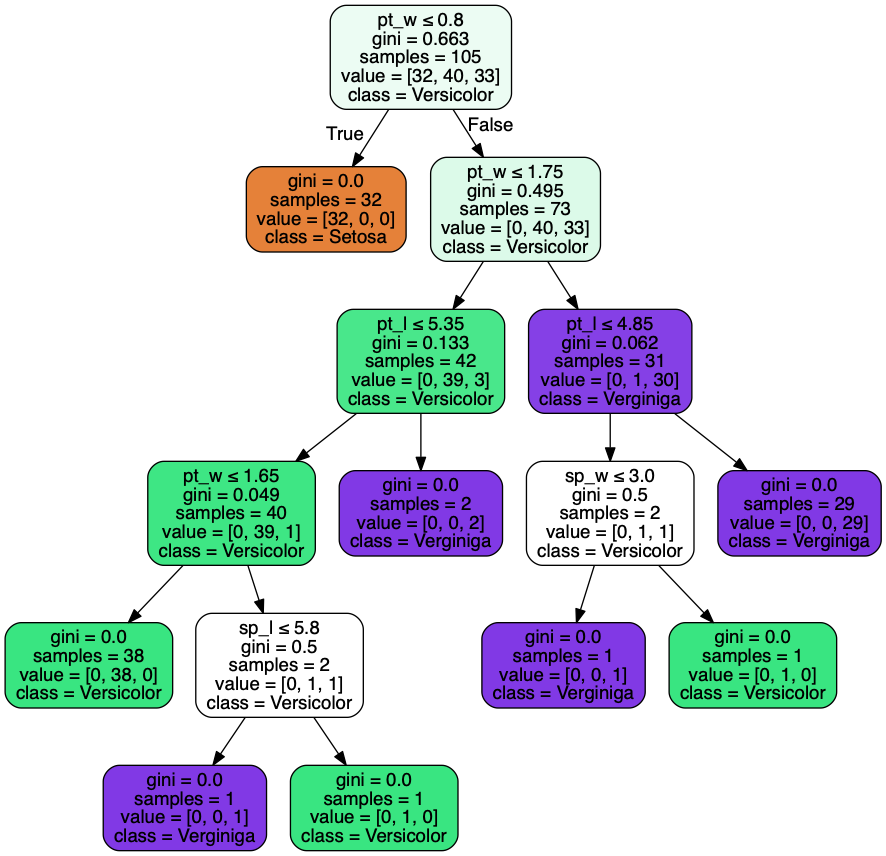

In [48]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  feature_names=['sp_l','sp_w','pt_l','pt_w'], 
                class_names=['Setosa','Versicolor','Verginiga'],filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [49]:
print("Predicting iris on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=iris['species'].unique()))
print(confusion_matrix(y_test, y_pred))


Predicting iris on the test set
done in 0.001s
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.88      0.94        17

    avg / total       0.96      0.96      0.96        45

[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]


There are many parameter that control the complexity of a tree, but the one that might be easiest to understand is the maximum depth. This limits how finely the tree can partition the input space, or how many "if-else" questions can be asked before deciding which class a sample lies in.

This parameter is important to tune for trees and tree-based models. The interactive plot below shows how underfit and overfit looks like for this model. Having a ``max_depth`` of 1 is clearly an underfit model, while a depth of 7 or 8 clearly overfits. The maximum depth a tree can be grown at for this dataset is 8, at which point each leave only contains samples from a single class. This is known as all leaves being "pure."

In the interactive plot below, the regions are assigned blue and red colors to indicate the predicted class for that region. The shade of the color indicates the predicted probability for that class (darker = higher probability), while yellow regions indicate an equal predicted probability for either class.

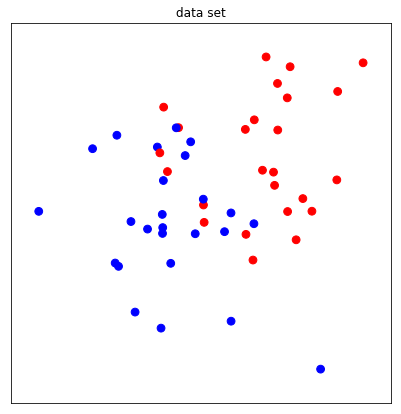

In [18]:
from figures import plot_tree_interactive
plot_tree_interactive()

Decision trees are fast to train, easy to understand, and often lead to interpretable models. However, single trees often tend to overfit the training data. Playing with the slider above you might notice that the model starts to overfit even before it has a good separation between the classes.

Therefore, in practice it is more common to combine multiple trees to produce models that generalize better. The most common methods for combining trees are random forests and gradient boosted trees.


## Random Forests

Random forests are simply many trees, built on different random subsets (drawn with replacement) of the data, and using different random subsets (drawn without replacement) of the features for each split.
This makes the trees different from each other, and makes them overfit to different aspects. Then, their predictions are averaged, leading to a smoother estimate that overfits less.


## Selecting the Optimal Estimator via Cross-Validation

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [76]:
clf.score(X_train, y_train)

1.0

In [77]:
print("Predicting iris on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=iris['species'].unique()))
print(confusion_matrix(y_test, y_pred))

Predicting iris on the test set
done in 0.021s
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.77      1.00      0.87        10
 Iris-virginica       1.00      0.82      0.90        17

    avg / total       0.95      0.93      0.93        45

[[18  0  0]
 [ 0 10  0]
 [ 0  3 14]]


## AdaBoost Classifier

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=1234)

clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train)
scores.mean()  

0.8951758481170246

In [82]:
print("Predicting iris on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=iris['species'].unique()))
print(confusion_matrix(y_test, y_pred))

Predicting iris on the test set
done in 0.020s
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.67      1.00      0.80        10
 Iris-virginica       1.00      0.71      0.83        17

    avg / total       0.93      0.89      0.89        45

[[18  0  0]
 [ 0 10  0]
 [ 0  5 12]]


## Another option: Gradient Boosting

Another Ensemble method that can be useful is *Boosting*: here, rather than
looking at 200 (say) parallel estimators, We construct a chain of 200 estimators
which iteratively refine the results of the previous estimator.
The idea is that by sequentially applying very fast, simple models, we can get a
total model error which is better than any of the individual pieces.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=.2)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

## Exercise: Cross-validating Gradient Boosting

Use a grid search to optimize the `learning_rate` and `max_depth` for a Gradient Boosted
Decision tree on the digits data set.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier

digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# split the dataset, apply grid-search

In [ ]:
#%load solutions/19_gbc_grid.py